In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
71/71 [==============================] - 12s 171ms/step - loss: 2.6297 - acc: 0.3398 - val_loss: 2.3875 - val_acc: 0.3620
Epoch 2/20
71/71 [==============================] - 11s 154ms/step - loss: 2.2986 - acc: 0.4325 - val_loss: 2.3019 - val_acc: 0.4711
Epoch 3/20
71/71 [==============================] - 11s 152ms/step - loss: 2.0798 - acc: 0.5000 - val_loss: 1.9676 - val_acc: 0.5120
Epoch 4/20
71/71 [==============================] - 12s 174ms/step - loss: 1.8708 - acc: 0.5174 - val_loss: 1.8047 - val_acc: 0.5370
Epoch 5/20
71/71 [==============================] - 12s 167ms/step - loss: 1.7564 - acc: 0.5475 - val_loss: 1.7536 - val_acc: 0.5463
Epoch 6/20
71/71 [==============================] - 11s 150ms/step - loss: 1.6778 - acc: 0.5574 - val_loss: 1.7275 - val_acc: 0.5592
Epoch 7/20
71/71 [==============================] - 10s 148ms/step - loss: 1.6227 - acc: 0.5843 - val_loss: 1.7138 - val_acc: 0.5748
Epoch 8/20
71/71 [==============================] - 11s 160ms/step - 

In [2]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


C:\Temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

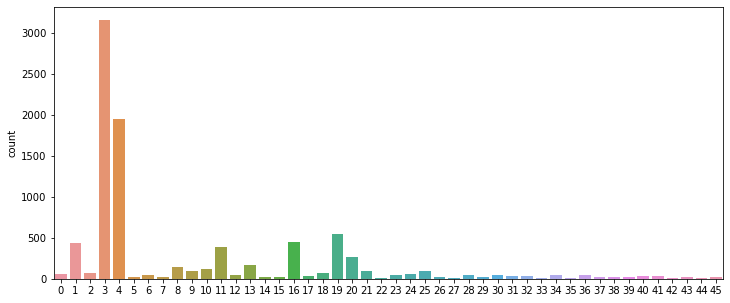

In [3]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [20]:
new_list = []
for i in y_train:
    if i not in new_list:
        new_list.append(i)

print(new_list)

new_list.sort()
print(new_list)

[3, 4, 16, 19, 8, 21, 11, 1, 13, 20, 18, 25, 35, 9, 38, 10, 28, 2, 6, 12, 7, 30, 34, 15, 14, 32, 41, 40, 45, 23, 42, 26, 24, 37, 27, 31, 39, 0, 22, 33, 36, 17, 43, 29, 44, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [16]:
for i in range(0, num_classes):
    print('데이터 ', i, ' : 카테고리 ', y_train[i])

데이터  0  : 카테고리  3
데이터  1  : 카테고리  4
데이터  2  : 카테고리  3
데이터  3  : 카테고리  4
데이터  4  : 카테고리  4
데이터  5  : 카테고리  4
데이터  6  : 카테고리  4
데이터  7  : 카테고리  3
데이터  8  : 카테고리  3
데이터  9  : 카테고리  16
데이터  10  : 카테고리  3
데이터  11  : 카테고리  3
데이터  12  : 카테고리  4
데이터  13  : 카테고리  4
데이터  14  : 카테고리  19
데이터  15  : 카테고리  8
데이터  16  : 카테고리  16
데이터  17  : 카테고리  3
데이터  18  : 카테고리  3
데이터  19  : 카테고리  21
데이터  20  : 카테고리  11
데이터  21  : 카테고리  4
데이터  22  : 카테고리  4
데이터  23  : 카테고리  3
데이터  24  : 카테고리  3
데이터  25  : 카테고리  1
데이터  26  : 카테고리  3
데이터  27  : 카테고리  1
데이터  28  : 카테고리  3
데이터  29  : 카테고리  16
데이터  30  : 카테고리  1
데이터  31  : 카테고리  4
데이터  32  : 카테고리  13
데이터  33  : 카테고리  20
데이터  34  : 카테고리  1
데이터  35  : 카테고리  4
데이터  36  : 카테고리  4
데이터  37  : 카테고리  11
데이터  38  : 카테고리  3
데이터  39  : 카테고리  3
데이터  40  : 카테고리  3
데이터  41  : 카테고리  11
데이터  42  : 카테고리  16
데이터  43  : 카테고리  4
데이터  44  : 카테고리  4
데이터  45  : 카테고리  20


In [22]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

new_list = []
for i in y_train:
    if i not in new_list:
        new_list.append(i)

# print(new_list)
new_list.sort()
print(new_list)

for i in range(1, 51):
    print('데이터 ', i, ' : 카테고리 ', y_train[i])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
데이터  1  : 카테고리  4
데이터  2  : 카테고리  3
데이터  3  : 카테고리  4
데이터  4  : 카테고리  4
데이터  5  : 카테고리  4
데이터  6  : 카테고리  4
데이터  7  : 카테고리  3
데이터  8  : 카테고리  3
데이터  9  : 카테고리  16
데이터  10  : 카테고리  3
데이터  11  : 카테고리  3
데이터  12  : 카테고리  4
데이터  13  : 카테고리  4
데이터  14  : 카테고리  19
데이터  15  : 카테고리  8
데이터  16  : 카테고리  16
데이터  17  : 카테고리  3
데이터  18  : 카테고리  3
데이터  19  : 카테고리  21
데이터  20  : 카테고리  11
데이터  21  : 카테고리  4
데이터  22  : 카테고리  4
데이터  23  : 카테고리  3
데이터  24  : 카테고리  3
데이터  25  : 카테고리  1
데이터  26  : 카테고리  3
데이터  27  : 카테고리  1
데이터  28  : 카테고리  3
데이터  29  : 카테고리  16
데이터  30  : 카테고리  1
데이터  31  : 카테고리  4
데이터  32  : 카테고리  13
데이터  33  : 카테고리  20
데이터  34  : 카테고리  1
데이터  35  : 카테고리  4
데이터  36  : 카테고리  4
데이터  37  : 카테고리  11
데이터  38  : 카테고리  3
데이터  39  : 카테고리  3
데이터  40  : 카테고리  3
데이터  41  : 카테고리  11
데이터  42  : 카테고리  16
데이터  43  : 카테고리  4
데이터  4

In [1]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

new_list = []
for i in y_test:
    if i not in new_list:
        new_list.append(i)

# print(new_list)
new_list.sort()
print(new_list)

for i in range(1, 51):
    print('데이터 ', i, ' : 카테고리 ', y_test[i])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
데이터  1  : 카테고리  10
데이터  2  : 카테고리  1
데이터  3  : 카테고리  4
데이터  4  : 카테고리  4
데이터  5  : 카테고리  3
데이터  6  : 카테고리  3
데이터  7  : 카테고리  3
데이터  8  : 카테고리  3
데이터  9  : 카테고리  3
데이터  10  : 카테고리  5
데이터  11  : 카테고리  4
데이터  12  : 카테고리  1
데이터  13  : 카테고리  3
데이터  14  : 카테고리  1
데이터  15  : 카테고리  11
데이터  16  : 카테고리  23
데이터  17  : 카테고리  3
데이터  18  : 카테고리  19
데이터  19  : 카테고리  3
데이터  20  : 카테고리  8
데이터  21  : 카테고리  3
데이터  22  : 카테고리  3
데이터  23  : 카테고리  3
데이터  24  : 카테고리  9
데이터  25  : 카테고리  3
데이터  26  : 카테고리  4
데이터  27  : 카테고리  6
데이터  28  : 카테고리  10
데이터  29  : 카테고리  3
데이터  30  : 카테고리  3
데이터  31  : 카테고리  10
데이터  32  : 카테고리  20
데이터  33  : 카테고리  1
데이터  34  : 카테고리  19
데이터  35  : 카테고리  4
데이터  36  : 카테고리  40
데이터  37  : 카테고리  1
데이터  38  : 카테고리  4
데이터  39  : 카테고리  3
데이터  40  : 카테고리  15
데이터  41  : 카테고리  21
데이터  42  : 카테고리  3
데이터  43  : 카테고리  34
데이터  

In [23]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = 	imdb.load_data( num_words=10000)

import numpy as np
# 입력 텍스트 vectorization
def vectorize_sequences(sequences, dimension=10000): 
	results = np.zeros((len(sequences), dimension)) 
	for i, sequence in enumerate(sequences): 
		results[i, sequence] = 1. 
	return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
	metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.4579 - accuracy: 0.8178
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2623 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2017 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2960 - accuracy: 0.8816


In [33]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = 	imdb.load_data( num_words=10000)

import numpy as np
# 입력 텍스트 vectorization
def vectorize_sequences(sequences, dimension=10000): 
	results = np.zeros((len(sequences), dimension)) 
	for i, sequence in enumerate(sequences): 
		results[i, sequence] = 1. 
	return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
	metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4551 - accuracy: 0.8292
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2800 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2214 - accuracy: 0.9245
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2817 - accuracy: 0.8870


In [32]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = 	imdb.load_data( num_words=10000)

import numpy as np
# 입력 텍스트 vectorization
def vectorize_sequences(sequences, dimension=10000): 
	results = np.zeros((len(sequences), dimension)) 
	for i, sequence in enumerate(sequences): 
		results[i, sequence] = 1. 
	return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(32, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
	metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 22ms/step - loss: 0.4251 - accuracy: 0.8263
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2498 - accuracy: 0.9124
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2007 - accuracy: 0.9303
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3142 - accuracy: 0.8738


In [35]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = 	imdb.load_data( num_words=10000)

import numpy as np
# 입력 텍스트 vectorization
def vectorize_sequences(sequences, dimension=10000): 
	results = np.zeros((len(sequences), dimension)) 
	for i, sequence in enumerate(sequences): 
		results[i, sequence] = 1. 
	return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
	metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4098 - accuracy: 0.8189
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2419 - accuracy: 0.9125
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1905 - accuracy: 0.9303
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3322 - accuracy: 0.8691


In [30]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.9523 - accuracy: 0.4757 - val_loss: 2.0626 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 1s 35ms/step - loss: 1.6313 - accuracy: 0.6937 - val_loss: 1.4092 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 1.1372 - accuracy: 0.7632 - val_loss: 1.1845 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.8900 - accuracy: 0.8128 - val_loss: 1.0578 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 29ms/step - loss: 0.7163 - accuracy: 0.8559 - val_loss: 0.9937 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5834 - accuracy: 0.8831 - val_loss: 0.9602 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.4761 - accuracy: 0.9047 - val_loss: 0.9171 - val_accuracy: 0.8150
Epoch 8/20
16

In [31]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
X_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 37ms/step - loss: 2.5602 - accuracy: 0.5200 - val_loss: 1.6963 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.3977 - accuracy: 0.7043 - val_loss: 1.3296 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.0654 - accuracy: 0.7700 - val_loss: 1.1518 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8476 - accuracy: 0.8161 - val_loss: 1.0618 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6713 - accuracy: 0.8579 - val_loss: 0.9932 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5380 - accuracy: 0.8867 - val_loss: 0.9275 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.4300 - accuracy: 0.9129 - val_loss: 0.9021 - val_accuracy: 0.8120
Epoch 8/20
16